Import Warnings

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Import libraries

In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score,roc_curve, classification_report
from sklearn.metrics import confusion_matrix, make_scorer, roc_auc_score
from sklearn.metrics import RocCurveDisplay, ConfusionMatrixDisplay

In [3]:
pd.options.mode.chained_assignment = None

# EM

In [5]:
df = pd.read_csv('/Users/laura-alaerebrown/Downloads/EM.csv')

# EDA Analysis

       Creditscore  Likelihoodoffailure
count  8176.000000          8107.000000
mean     57.300514             5.222030
std      29.730987             4.402007
min      15.000000             0.900000
25%      29.000000             0.900000
50%      45.000000             4.500000
75%      90.000000            10.600000
max      99.000000            19.400000


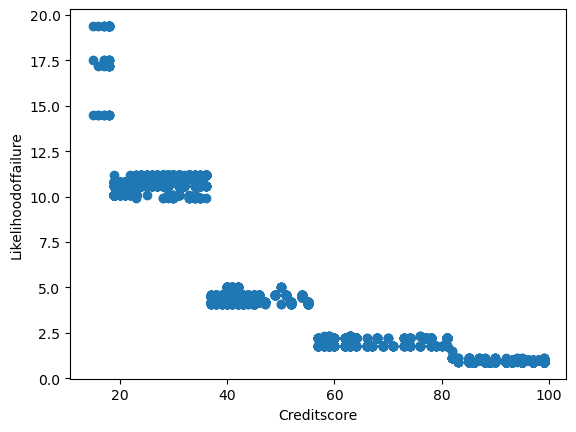

In [6]:
print(df[['Creditscore', 'Likelihoodoffailure']].describe())
import matplotlib.pyplot as plt
plt.scatter(df['Creditscore'], df['Likelihoodoffailure'])
plt.xlabel('Creditscore')
plt.ylabel('Likelihoodoffailure')
plt.show()

In [7]:
df['CreditLevel'] = (df['Creditscore'] > df['Creditscore'].mean()).astype(int)

In [13]:
num_cols = df.select_dtypes(include='number').columns
df = df[num_cols]

In [14]:
df = df.fillna(df.mean())

In [15]:
X = df.drop('CreditLevel', axis=1)
y = df['CreditLevel']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [16]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Logistic Regression

# Machine Learning Classification Methods 

In [29]:
X = df.iloc[:, 5:-1] 
Y = df.iloc[:, -1]

In [30]:
X

,ReturnonTotalAssets2019,ReturnonShareholdersFunds2020,ReturnonShareholdersFunds2019,ReturnonCapitalEmployed2020,ReturnonCapitalEmployed2019,TurnoverthGBP2020,TurnoverthGBP2019,NetAssetsTurnoverx2020,NetAssetsTurnoverx2019,TradeCreditorsthGBP2020,...,ShareholdersFundsthGBP2020,ShareholdersFundsthGBP2019,TaxationthGBP2020,TaxationthGBP2019,Grossmargin2020,Grossmargin2019,Currentratiox2020,Currentratiox2019,SolvencyratioLiabilitybased2020,SolvencyratioLiabilitybased2019
0,5.614489,65.895390,10.284360,51.135009,8.326938,2.720014e+04,6667000.000,19.650596,2.558327,-5944.581231,...,8.513789e+03,2.110000e+06,-536.39174,-50000.000000,44.991604,37.888106,4.137871,1.224782,35.770585,36.916356
1,2.832746,-0.283735,7.000426,-0.175859,4.070147,6.157500e+06,6955700.000,1.406304,1.565858,-892700.000000,...,2.713800e+06,2.582700e+06,-14200.00000,-58000.000000,29.740966,29.250830,1.474780,1.300454,85.144166,67.969367
2,3.817802,65.895390,18.074145,51.135009,15.152711,2.720014e+04,5915844.000,19.650596,12.485003,-5944.581231,...,8.513789e+03,3.972470e+05,-536.39174,-19589.000000,44.991604,13.304340,4.137871,0.892335,35.770585,26.779674
3,-5.702719,65.895390,-67.554766,51.135009,-15.251972,2.720014e+04,4506100.000,19.650596,6.023393,-5944.581231,...,8.513789e+03,1.689000e+05,-536.39174,-3300.000000,44.991604,10.490224,4.137871,0.921290,35.770585,9.219936
4,26.910621,169.535674,130.534489,28.898498,45.933410,4.266200e+06,4167400.000,1.647118,2.647986,-212800.000000,...,4.415000e+05,5.538000e+05,-138300.00000,-132500.000000,38.453425,35.374574,2.058749,1.826697,14.249290,25.969519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8171,51.344614,65.895390,92.855191,51.135009,82.954989,2.720014e+04,129.832,19.650596,3.169108,-5944.581231,...,3.186800e+01,3.660000e+01,-536.39174,-489.853105,44.991604,40.828643,1.778772,1.566767,30.805815,36.916356
8172,-73.025732,65.895390,51.214527,51.135009,-73.025732,2.720014e+04,1.127,19.650596,1.000000,-5944.581231,...,8.513789e+03,-8.230000e-01,-536.39174,-489.853105,44.991604,40.828643,4.137871,3.331513,35.770585,36.916356
8173,94.231524,65.895390,51.214527,51.135009,154.809464,2.720014e+04,409.369,19.650596,5.386718,-27.335000,...,9.206100e+01,1.070198e+04,-536.39174,-489.853105,44.991604,66.903454,0.962697,1.445911,35.770585,36.916356
8174,-100.000000,65.895390,51.214527,51.135009,38.020029,2.720014e+04,11.643,19.650596,16.561944,-5944.581231,...,-1.370200e+01,1.070198e+04,-536.39174,-489.853105,44.991604,16.189985,4.137871,1.000000,35.770585,36.916356


Split the data into training and testing sets

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, 
                                   shuffle=False)
X_test

,ReturnonTotalAssets2019,ReturnonShareholdersFunds2020,ReturnonShareholdersFunds2019,ReturnonCapitalEmployed2020,ReturnonCapitalEmployed2019,TurnoverthGBP2020,TurnoverthGBP2019,NetAssetsTurnoverx2020,NetAssetsTurnoverx2019,TradeCreditorsthGBP2020,...,ShareholdersFundsthGBP2020,ShareholdersFundsthGBP2019,TaxationthGBP2020,TaxationthGBP2019,Grossmargin2020,Grossmargin2019,Currentratiox2020,Currentratiox2019,SolvencyratioLiabilitybased2020,SolvencyratioLiabilitybased2019
6540,22.988502,65.895390,51.214527,51.135009,38.020029,13.432000,14.962000,19.650596,16.561944,-35.447000,...,0.00600,0.006000,-536.39174,-489.853105,44.991604,40.828643,1.000161,1.000225,0.016113,0.022498
6541,50.348492,31.396090,50.348492,31.396090,50.348492,13.417000,11.301000,0.503395,0.645624,-5944.581231,...,26.65300,17.504000,-1.59000,-1.674000,44.991604,83.045748,4.137871,3.331513,35.770585,36.916356
6542,22.988502,38.785226,51.214527,38.785226,38.020029,13.402000,32218.511777,1.029102,16.561944,-5944.581231,...,13.02300,8.688000,-0.96000,-489.853105,90.792419,40.828643,14.565625,13.236620,35.770585,36.916356
6543,-171.473952,65.895390,51.214527,51.135009,-171.473952,27200.140834,13.390000,19.650596,8.506989,-5944.581231,...,8513.78879,-20.121000,-536.39174,-489.853105,44.991604,40.828643,4.137871,3.331513,35.770585,36.916356
6544,2.319147,65.895390,2.348141,51.135009,2.327810,27200.140834,13.358000,19.650596,0.058981,-5944.581231,...,8513.78879,224.518000,-536.39174,-1.215000,44.991604,83.268453,4.137871,32.297872,35.770585,36.916356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8171,51.344614,65.895390,92.855191,51.135009,82.954989,27200.140834,129.832000,19.650596,3.169108,-5944.581231,...,31.86800,36.600000,-536.39174,-489.853105,44.991604,40.828643,1.778772,1.566767,30.805815,36.916356
8172,-73.025732,65.895390,51.214527,51.135009,-73.025732,27200.140834,1.127000,19.650596,1.000000,-5944.581231,...,8513.78879,-0.823000,-536.39174,-489.853105,44.991604,40.828643,4.137871,3.331513,35.770585,36.916356
8173,94.231524,65.895390,51.214527,51.135009,154.809464,27200.140834,409.369000,19.650596,5.386718,-27.335000,...,92.06100,10701.981355,-536.39174,-489.853105,44.991604,66.903454,0.962697,1.445911,35.770585,36.916356
8174,-100.000000,65.895390,51.214527,51.135009,38.020029,27200.140834,11.643000,19.650596,16.561944,-5944.581231,...,-13.70200,10701.981355,-536.39174,-489.853105,44.991604,16.189985,4.137871,1.000000,35.770585,36.916356


Standardize the features 

In [32]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Train the Logistic Regression model
modellr = LogisticRegression(random_state=101)
modellr.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = modellr.predict(X_test_scaled)

# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1356
           1       0.99      0.99      0.99      1097

    accuracy                           0.99      2453
   macro avg       0.99      0.99      0.99      2453
weighted avg       0.99      0.99      0.99      2453



# Extra Trees 

In [34]:
#Model
modelet = ExtraTreesClassifier(random_state=101)
# Train the model
modelet.fit(X_train, Y_train)
# Predict on the test set
Y_pred = modelet.predict(X_test)

print (classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1478
           1       0.44      0.54      0.48       158

    accuracy                           0.89      1636
   macro avg       0.69      0.73      0.71      1636
weighted avg       0.90      0.89      0.89      1636



# Cross Validation

Cross Validation for Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Train the Logistic Regression model with cross-validation
modellr = LogisticRegression(random_state=101)
accuracy_scores = cross_val_score(modellr, X_train_scaled, y_train, cv=5)

# Print mean and standard deviation of accuracy
print(f"Mean Accuracy: {accuracy_scores.mean():.2f}")
print(f"Standard Deviation: {accuracy_scores.std():.2f}")

Mean Accuracy: 0.99
Standard Deviation: 0.00


Cross Validation for Extra Trees 

In [40]:
accuracy_scores = cross_val_score(modelet, X, Y, cv=5, 
                scoring=make_scorer(accuracy_score))

# Mean and standard deviation of accuracy
print(f"Mean Accuracy: {accuracy_scores.mean():.2f}")
print(f"Standard Deviation Accuracy: {accuracy_scores.std():.2f}")

Mean Accuracy: 0.76
Standard Deviation Accuracy: 0.17


# Prediction of the target based on X_test

In [47]:
modelet = ExtraTreesClassifier(random_state=101)
modelet.fit(X_train, Y_train)
Y_pred = modelet.predict(X_test)

classification_rep = classification_report(Y_test, Y_pred)
print("Classification Report:\n", classification_rep)

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94      1478
           1       0.44      0.54      0.48       158

    accuracy                           0.89      1636
   macro avg       0.69      0.73      0.71      1636
weighted avg       0.90      0.89      0.89      1636



Confusion Matrix

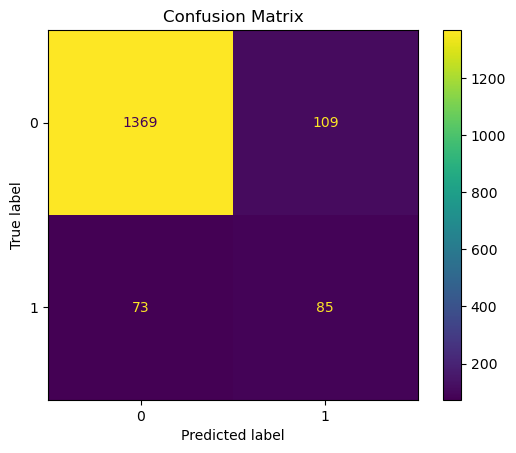

In [48]:
# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)

# Evaluate the modelet by means of a Confusion Matrix
matrix = ConfusionMatrixDisplay.from_estimator(modelet, X_test, Y_test)  
plt.title('Confusion Matrix')
plt.show(matrix)
plt.show()

ROC Curve

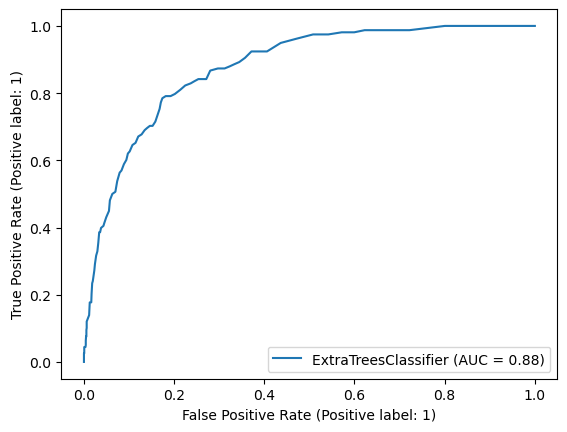

In [49]:
# ROC Curve
log_disp = RocCurveDisplay.from_estimator(modelet, X_test, Y_test)

# Feature Importance

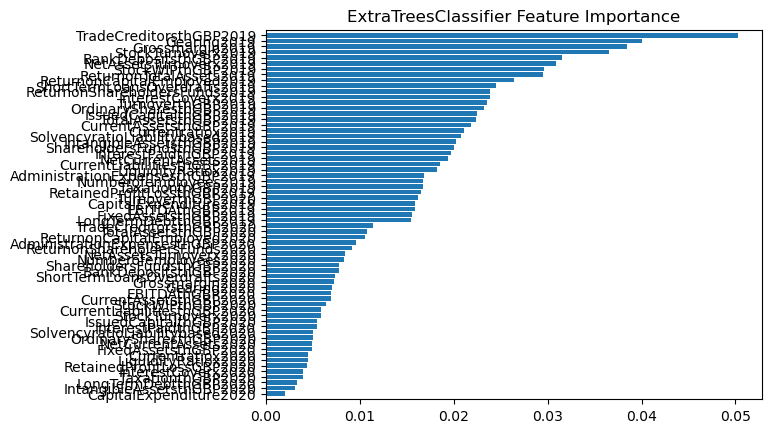

In [50]:
#Importance of classifiers 
feature_names=X.columns
importance = modelet.feature_importances_ 
indices = np.argsort(importance)
range1 = range(len(importance[indices]))
plt.figure()
plt.title("ExtraTreesClassifier Feature Importance")
plt.barh(range1,importance[indices])
plt.yticks(range1, feature_names[indices])
plt.ylim([-1, len(range1)])
plt.show()